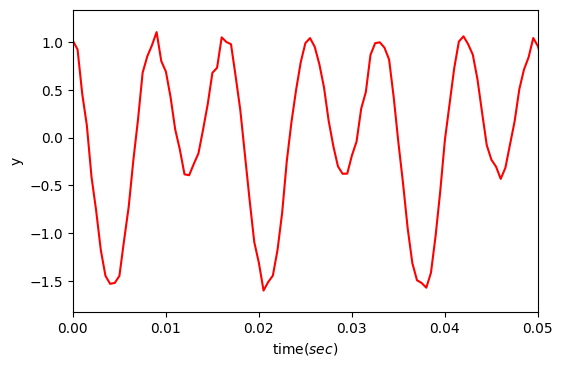

In [51]:

# https://techreviewtips.blogspot.com/2017/11/05-02-fft.html 의 소스코드에 주석을 달았습니다.
# FFT를 어떻게 사용할 수 있는지 공부하기 위한 리포지토리입니다.

import matplotlib.pyplot as plt
import numpy as np
import math

#초당 2000번 Sampling
Fs = 2000
T = 1/Fs
te= 0.5

# 0에서 0.5까지, 1/2000 간격의 배열 만든다.
t = np.arange(0, te, T)

# Sum of a 50 Hz sinusoid and a 120 Hz sinusoid
# (50Hz 사인파와 120Hz 사인파 합친다.)
noise = np.random.normal(0,0.05,len(t))
x = 0.6*np.cos(2*np.pi*60*t+np.pi/2) + np.cos(2*np.pi*120*t)
y = x + # noise #필요하다면 Noise 추가 가능


plt.figure(num=1,dpi=100,facecolor='white')
plt.plot(t,y,'r')
plt.xlim(0, 0.05)
plt.xlabel('time($sec$)')
plt.ylabel('y')
plt.show()

In [54]:
# Calculate FFT ....................
n=len(y)        # Length of signal
NFFT=n      # ?? NFFT=2^nextpow2(length(y))  ??
k=np.arange(NFFT)
f0=k*Fs/NFFT    # double sides frequency range
f0=f0[range(math.trunc(NFFT/2))]        # single sied frequency range

Y=np.fft.fft(y)/NFFT        # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

[5.09533171e-03 2.43777295e-03 5.61506045e-03 1.40543346e-03
 4.09595421e-03 8.10015019e-04 4.68220904e-03 1.82064673e-03
 2.72815357e-03 2.37275138e-03 3.93258740e-03 3.18379962e-03
 5.21393120e-03 2.27861622e-03 4.39916933e-03 2.98832718e-04
 2.50792119e-03 2.39386840e-03 2.43787866e-03 4.21348968e-03
 1.26324811e-03 1.90762184e-03 1.54774088e-03 4.89988567e-03
 2.53000232e-03 7.19671177e-04 2.29713216e-03 1.46679476e-03
 2.04002652e-03 1.56418775e-03 5.98313530e-01 5.02455324e-03
 4.32399905e-03 6.41037761e-04 1.68809550e-03 4.34361642e-03
 8.43666613e-04 2.31220158e-03 5.96884085e-04 2.27720851e-03
 2.05494159e-03 3.11497938e-03 4.62184332e-03 5.92323480e-03
 8.80782048e-03 2.76208612e-03 1.94338898e-03 3.82679655e-03
 3.68575222e-03 3.71391062e-03 9.76465900e-04 4.62463509e-03
 1.74405044e-03 3.55202165e-03 2.74942805e-03 2.52626036e-03
 2.34794663e-03 6.84505504e-04 3.79814780e-03 5.93320593e-04
 1.00204225e+00 2.57889765e-03 2.12163740e-03 1.36418366e-03
 2.09344231e-03 3.963326

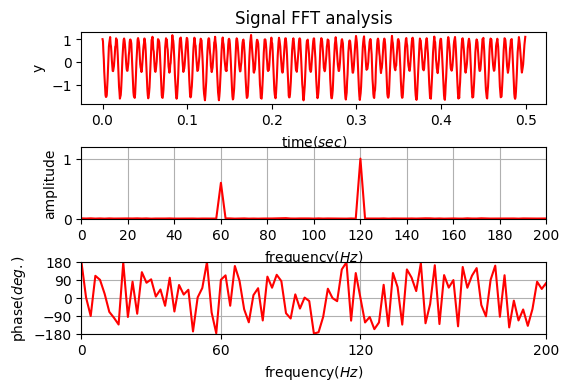

In [53]:
# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)

plt.plot(t,y,'r')
plt.title('Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')
#plt.xlim( 0, 0.1)

# Amplitude ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,2)

# Plot single-sided amplitude spectrum.

plt.plot(f0,amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
#plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
#plt.title('Single-Sided Phase Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.show()